https://dacon.io/competitions/official/235584/codeshare/1047?page=1&dtype=recent&ptype=pub


# 1. 라이브러리 및 데이터
## Lib & Data
### Lib

In [22]:
# Fundamentals
import os 
import sys
import numpy as np
import pandas as pd
np.random.seed(55)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# ML Algorithms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Multiprocessing
from multiprocessing.dummy import Pool as ThreadPool

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
os.getcwd()

'C:\\Users\\ksh\\temp\\dacon1'

In [5]:
sys.getdefaultencoding()

'utf-8'

### Data

In [39]:
# Load datasets
sample_submission = pd.read_csv('data/sample_submission.csv')
train = pd.read_csv('data/train.csv', index_col='id')
test = pd.read_csv('data/test.csv', index_col='id')
train.head()
test.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
id,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,
4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,...,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,...,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,...,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,...,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,...,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


In [13]:
# 편리하고 직관적인 Visionaliztion을 위한 Indicator Dictionary
indicator_dict = {
    'temperature'   : ["X00","X07","X28","X31","X32"], #기온
    'localpressure' : ["X01","X06","X22","X27","X29"], #현지기압
    'windspeed'     : ["X02","X03","X18","X24","X26"], #풍속
    'precipitation' : ["X04","X10","X21","X36","X39"], #일일 누적강수량
    'atmpressure'   : ["X05","X08","X09","X23","X33"], #해면기압
    'insolation'    : ["X11","X34","X14","X16","X19"], #일일 누적일사량
    'humidity'      : ["X12","X20","X30","X37","X38"], #습도
    'winddirection' : ["X13","X15","X17","X25","X35"], #풍향
}
indicator_dict

{'temperature': ['X00', 'X07', 'X28', 'X31', 'X32'],
 'localpressure': ['X01', 'X06', 'X22', 'X27', 'X29'],
 'windspeed': ['X02', 'X03', 'X18', 'X24', 'X26'],
 'precipitation': ['X04', 'X10', 'X21', 'X36', 'X39'],
 'atmpressure': ['X05', 'X08', 'X09', 'X23', 'X33'],
 'insolation': ['X11', 'X34', 'X14', 'X16', 'X19'],
 'humidity': ['X12', 'X20', 'X30', 'X37', 'X38'],
 'winddirection': ['X13', 'X15', 'X17', 'X25', 'X35']}

In [23]:
idx1 = train[train['Y18'].isnull()].index
idx1
idx2 = train[~train['Y18'].isnull()].index
idx2

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319],
           dtype='int64', name='id', length=4320)

Int64Index([4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329,
            ...
            4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751],
           dtype='int64', name='id', length=432)

In [26]:
train.columns
train.columns[:40]
train.columns[40:-1]

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')

Index(['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'],
      dtype='object')

In [32]:
train1_X = train[train.columns[:40]].loc[idx1].copy()
train1_Ys = train[train.columns[40:-1]].loc[idx1].copy()

In [47]:
train2_X = train[train.columns[:40]].loc[idx2].copy()
train2_Y18 = train[train.columns[-1]].loc[idx2].copy()
train2_Y18

id
4320    20.5
4321    20.5
4322    20.5
4323    20.5
4324    20.5
        ... 
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Name: Y18, Length: 432, dtype: float64

In [36]:
test_X = test.copy()
test_X

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,
4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,...,91.4,17.5,19.2,1007.6,0.00,194.7,0.0,84.0,59.9,0.0
4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,...,91.6,17.4,19.1,1007.5,0.00,173.1,0.0,84.0,60.5,0.0
4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,...,92.0,17.2,19.0,1007.5,0.00,208.6,0.0,85.0,60.8,0.0
4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,...,93.0,17.2,18.8,1007.4,0.00,185.0,0.0,85.8,61.2,0.0
4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,...,92.3,17.4,18.9,1007.5,0.00,162.8,0.0,87.3,61.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,...,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5
16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,...,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5
16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,...,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5


In [38]:
combined_X = pd.concat([train1_X, train2_X, test_X], axis=0)
combined_X

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,69.1,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,70.3,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,71.5,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,...,73.2,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,...,74.3,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,...,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5
16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,...,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5
16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,...,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5


In [40]:
X_list = [train1_X, train2_X, test_X]
X_list

[       X00    X01  X02  X03  X04     X05    X06   X07     X08     X09  ...  \
 id                                                                     ...   
 0      9.7  988.8  1.2  0.6  0.0  1009.3  989.6  12.2  1009.9  1009.8  ...   
 1      9.3  988.9  1.7  1.9  0.0  1009.3  989.6  12.1  1010.0  1009.9  ...   
 2      9.4  989.0  1.1  2.3  0.0  1009.2  989.7  12.1  1010.1  1010.1  ...   
 3      9.4  988.9  1.5  0.7  0.0  1009.2  989.6  12.0  1010.0  1010.0  ...   
 4      9.2  988.9  0.8  1.7  0.0  1009.2  989.7  12.0  1010.1  1010.0  ...   
 ...    ...    ...  ...  ...  ...     ...    ...   ...     ...     ...  ...   
 4315  19.5  987.8  1.7  0.4  0.0  1007.8  988.0  21.3  1007.8  1007.5  ...   
 4316  19.3  987.7  2.1  0.9  0.0  1007.8  988.1  21.3  1008.0  1007.4  ...   
 4317  19.5  987.8  0.9  1.3  0.0  1007.8  988.3  21.2  1008.1  1007.5  ...   
 4318  20.0  987.8  1.4  0.5  0.0  1007.8  988.3  21.1  1008.1  1007.5  ...   
 4319  20.1  987.8  1.2  1.2  0.0  1007.8  988.2  20

# 2. 데이터 전처리
## Data Cleansing & Pre-Processing
### 1) Check Missing Value

In [48]:
combined_X.isnull().sum().sum()
train1_Ys.isnull().sum().sum()
train2_Y18.isnull().sum().sum()

0

0

0

### 2) Check Anomalies

Text(0.5, 1.0, 'temperature')

Text(0.5, 1.0, 'localpressure')

Text(0.5, 1.0, 'windspeed')

Text(0.5, 1.0, 'precipitation')

Text(0.5, 1.0, 'atmpressure')

Text(0.5, 1.0, 'insolation')

Text(0.5, 1.0, 'humidity')

Text(0.5, 1.0, 'winddirection')

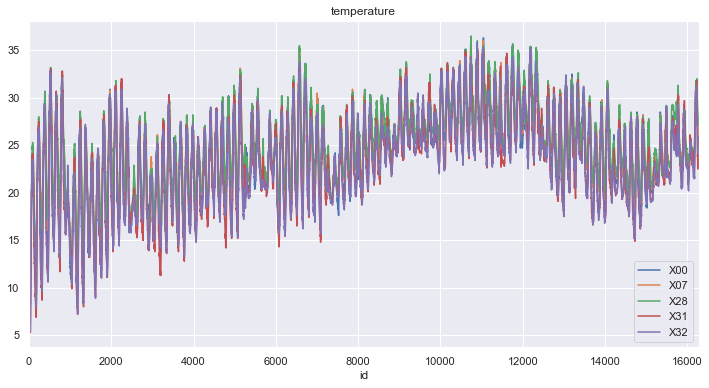

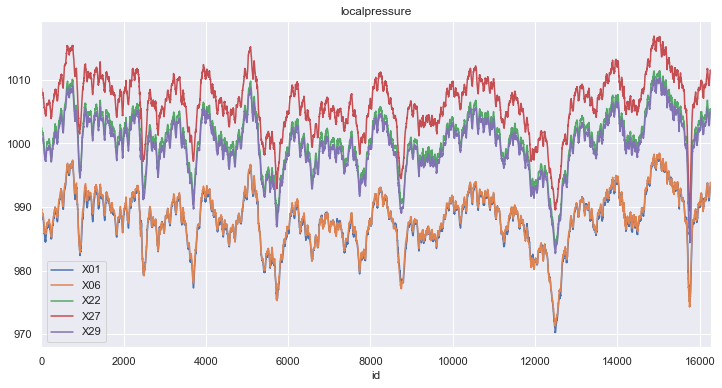

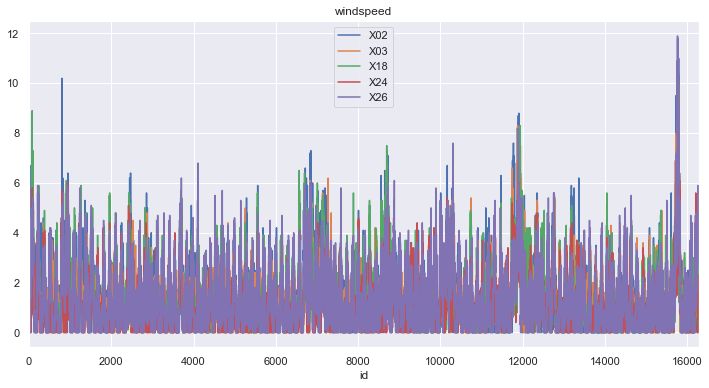

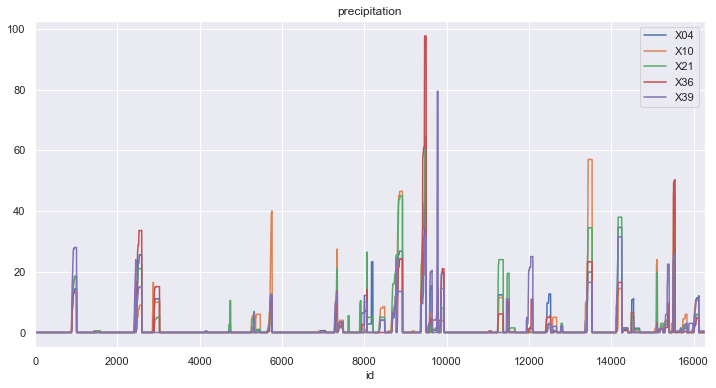

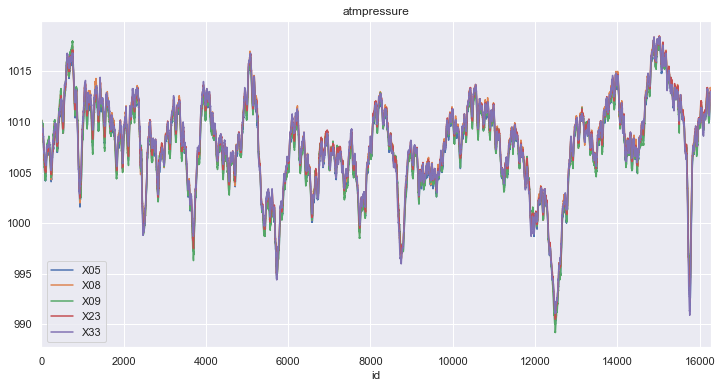

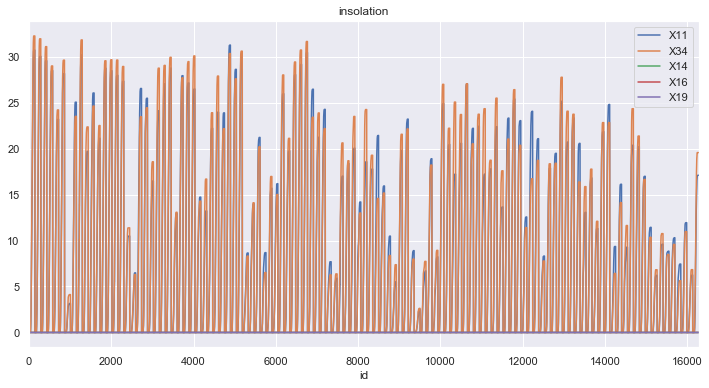

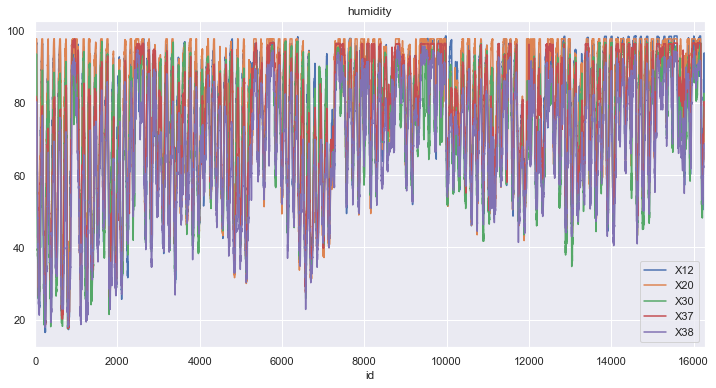

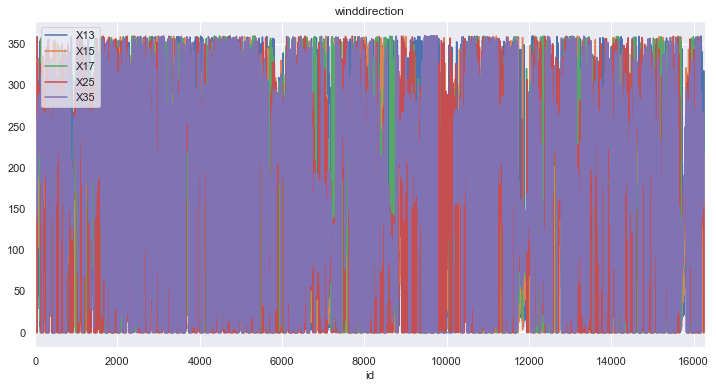

In [55]:
for k, v in indicator_dict.items():
    #print(k, ': ', v)
    combined_X.reset_index().plot(x='id', y=v, figsize=(12,6))
    plt.gca().set_title(k)

### 3) Time Series

In [61]:
# for X in X_list + 
for X in X_list + [combined_X]:
    X['date'] = X.index // 144
    X['time'] = X.index % 144

In [63]:
X['date']
X['time']

id
0          0
1          0
2          0
3          0
4          0
        ... 
16267    112
16268    112
16269    112
16270    112
16271    112
Name: date, Length: 16272, dtype: int64

id
0          0
1          1
2          2
3          3
4          4
        ... 
16267    139
16268    140
16269    141
16270    142
16271    143
Name: time, Length: 16272, dtype: int64